In [3]:
import pandas as pd 
pd.set_option('display.max_columns',None)
import sys
sys.path.append("..")
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


ModuleNotFoundError: No module named 'scipy'

In [2]:
df=pd.read_csv('../data/notnulls_data.csv')
df.sample()

,user_id,group,visit_date,conversion,product_category,product_id,product_name,quantity,price,discount,total_value,payment_method,shipping_method,region,customer_age,customer_gender,device,session_duration,coupon_used,browser,referral_source,conversion_str
1226,1227,a,2022-01-26,1,toys,1122,action_figure,2,69.16,0.12,121.72,paypal,express,north,24.0,f,mobile,4,no,safari,organic,yes


In [3]:
df['group'].unique()

array(['a', 'b'], dtype=object)

In [4]:
def explora_df_abtesting (df, control_col):
    for categoric in df['control_col'].unique():
        df_filter= df[df['control_col']== categoric]
        print(f'Main statistics for the categorical column {categoric.upper()}')
        display(df_filter.describe(include='O').T)
        print(f'Main statistics for the numerical columns {categoric.upper()}')
        display(df_filter.describe().T)
        print('_________________________________________________________')

In [5]:
for categoric in df['group'].unique():
    df_filter= df[df['group']== categoric]
    print(f'Main statistics for the categorical column {categoric.upper()}')
    display(df_filter.describe(include='O').T)
    print(f'Main statistics for the numerical columns {categoric.upper()}')
    display(df_filter.describe().T)
    print('_________________________________________________________')

Main statistics for the categorical column A


,count,unique,top,freq
group,987,1,a,987
visit_date,987,90,2022-01-19,19
product_category,987,7,fashion,165
product_name,987,28,jeans,49
payment_method,987,5,no_conversion,886
shipping_method,987,4,no_conversion,886
region,987,5,south,225
customer_gender,987,3,f,492
device,987,3,tablet,354
coupon_used,987,3,no_conversion,886


Main statistics for the numerical columns A


,count,mean,std,min,25%,50%,75%,max
user_id,987.0,999.448835,576.199597,1.00,518.50,983.00,1498.50,2000.00
conversion,987.0,0.102330,0.303236,0.00,0.00,0.00,0.00,1.00
product_id,987.0,1498.579534,293.157734,1001.00,1248.00,1495.00,1754.50,1998.00
quantity,987.0,0.291793,0.972212,0.00,0.00,0.00,0.00,5.00
price,970.0,182.754680,211.037497,5.02,46.98,97.79,236.08,998.88
discount,965.0,0.152446,0.086549,0.00,0.08,0.15,0.23,0.30
total_value,987.0,41.642280,218.045865,0.00,0.00,0.00,0.00,2899.50
customer_age,964.0,43.622407,15.442943,18.00,30.00,43.00,57.00,70.00
session_duration,987.0,15.721378,8.697904,1.00,8.00,16.00,23.00,30.00


_________________________________________________________
Main statistics for the categorical column B


,count,unique,top,freq
group,1013,1,b,1013
visit_date,1013,90,2022-01-28,22
product_category,1013,7,fashion,156
product_name,1013,28,science_fiction,58
payment_method,1013,5,no_conversion,867
shipping_method,1013,4,no_conversion,867
region,1013,5,east,217
customer_gender,1013,3,f,505
device,1013,3,mobile,357
coupon_used,1013,3,no_conversion,867


Main statistics for the numerical columns B


,count,mean,std,min,25%,50%,75%,max
user_id,1013.0,1001.524186,579.036318,2.00,489.00,1015.000,1501.0000,1997.00
conversion,1013.0,0.144126,0.351391,0.00,0.00,0.000,0.0000,1.00
product_id,1013.0,1504.463968,281.364999,1000.00,1266.00,1527.000,1736.0000,1997.00
quantity,1013.0,0.448174,1.200514,0.00,0.00,0.000,0.0000,5.00
price,990.0,186.352879,212.994052,5.34,45.23,109.495,236.1825,995.65
discount,995.0,0.148070,0.086621,0.00,0.07,0.150,0.2200,0.30
total_value,1013.0,61.607828,249.343541,0.00,0.00,0.000,0.0000,2904.07
customer_age,996.0,42.705823,15.276836,18.00,29.00,42.000,56.0000,70.00
session_duration,1013.0,15.547878,8.690150,1.00,8.00,16.000,23.0000,30.00


_________________________________________________________


In [6]:
df.columns

Index(['user_id', 'group', 'visit_date', 'conversion', 'product_category',
       'product_id', 'product_name', 'quantity', 'price', 'discount',
       'total_value', 'payment_method', 'shipping_method', 'region',
       'customer_age', 'customer_gender', 'device', 'session_duration',
       'coupon_used', 'browser', 'referral_source', 'conversion_str'],
      dtype='object')

Text(0.5, 1.0, 'quantity')

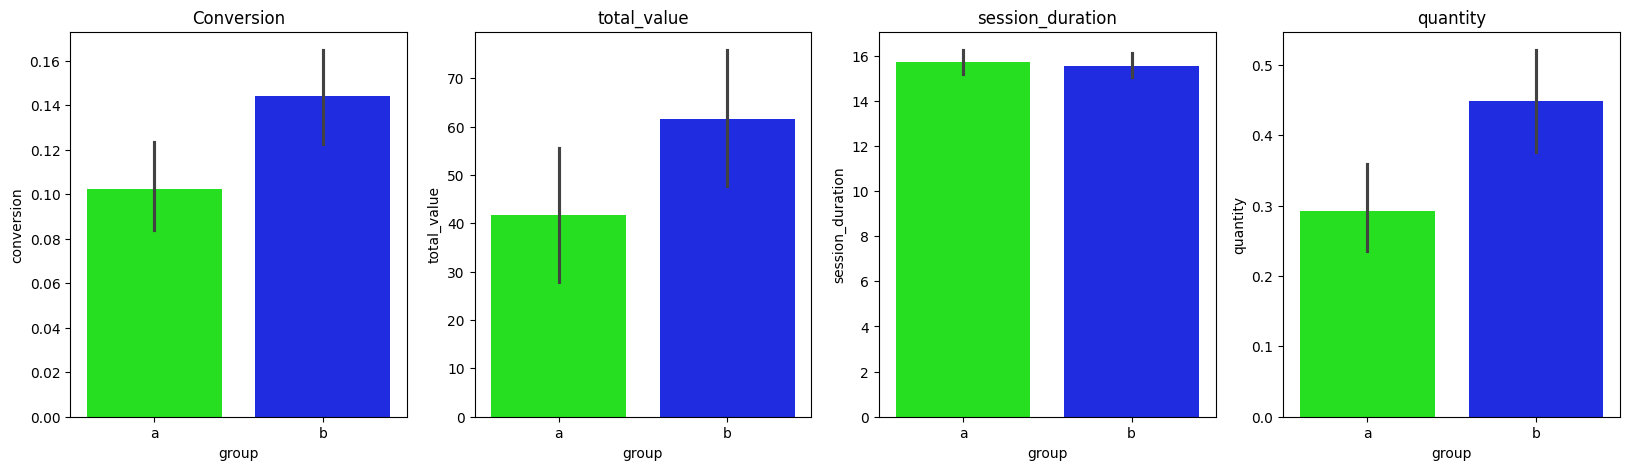

In [7]:
fig,axes= plt.subplots(nrows=1,ncols=4,figsize=( 20,5))
sns.barplot(x='group',y='conversion',data=df,ax=axes[0],hue='group',palette='hsv')
axes[0].set_title('Conversion')
sns.barplot(x='group',y='total_value',data=df,ax=axes[1],hue='group',palette='hsv')
axes[1].set_title('total_value')
sns.barplot(x='group',y='session_duration',data=df,ax=axes[2],hue='group',palette='hsv')
axes[2].set_title('session_duration')
sns.barplot(x='group',y='quantity',data=df,ax=axes[3],hue='group',palette='hsv')
axes[3].set_title('quantity')

In [8]:
df.columns

Index(['user_id', 'group', 'visit_date', 'conversion', 'product_category',
       'product_id', 'product_name', 'quantity', 'price', 'discount',
       'total_value', 'payment_method', 'shipping_method', 'region',
       'customer_age', 'customer_gender', 'device', 'session_duration',
       'coupon_used', 'browser', 'referral_source', 'conversion_str'],
      dtype='object')

In [9]:
metrics= ['conversion','total_value','session_duration','quantity']

In [10]:
def normalidad (df, list_metric):
    for metric in list_metric:
        statistic,pvalue= stats.shapiro(df[metric])
        if pvalue > 0.05:
            print(f"The {metric.upper()} column follows a normal distribution.")
        else:
            print(f"The {metric.upper()} column does not follow a normal distribution.")
        

In [11]:
normalidad(df,metrics)

The CONVERSION column does not follow a normal distribution.
The TOTAL_VALUE column does not follow a normal distribution.
The SESSION_DURATION column does not follow a normal distribution.
The QUANTITY column does not follow a normal distribution.


In [12]:
def homocedasticidad (df, col_control,list_metrics):
    for metric in list_metrics:
        df_group=[]
        
        for value in df[col_control].unique():
            df_group.append(df[df[col_control]==value][metrics])
    
        statistic, p_value= stats.levene(*df_group)
        if pvalue > 0.05:
            print(f"The {metric.upper()} column follows a normal distribution.")
        else:
            print(f"The {metric.upper()} column does not follow a normal distribution.")
    

In [13]:
homocedasticidad(df,'group',metrics)

NameError: name 'pvalue' is not defined

In [ ]:
def manwhitneyu (df, col_control,list_metrics):
    for metric in list_metrics:
        value_control=df[col_control].unique()
        
        control=df[df[col_control]== value_control[0]][metric]
        test=df[df[col_control]==value_control[1]][metric]
    
        statistic, p_value= stats.mannwhitneyu(control,test)
        
        if p_value > 0.05:
            print(f"The {metric.upper()} column follows a normal distribution.")
        else:
            print(f"The {metric.upper()} column does not follow a normal distribution.")

In [ ]:
manwhitneyu(df,'group',metrics)

The CONVERSION column does not follow a normal distribution.
The TOTAL_VALUE column does not follow a normal distribution.
The SESSION_DURATION column follows a normal distribution.
The QUANTITY column does not follow a normal distribution.


Conclusion:

The A/B test shows significant differences between Group A and Group B. The results indicate that Group B has a higher conversion rate and a greater quantity of products purchased per user. Therefore, it is recommended to implement the conditions of Group B, as they have proven to be more effective in terms of performance and sales.